### A glass manufacturing plant uses different earth elements to design new glass materials based on customer requirements. For that, they would like to automate the process of classification as it’s a tedious job to manually classify them. Help the company achieve its objective by correctly classifying the glass type based on the other features using KNN algorithm.

In [1]:
import pandas as pd
import numpy as np

In [2]:
glass = pd.read_csv(r"C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\KNN\glass.csv")

In [3]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)


In [4]:
glass_n = norm_func(glass.iloc[:, :9])
glass_n.describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.316744,0.402684,0.597891,0.359784,0.507310,0.080041,0.327785,0.055570,0.111783
std,0.133313,0.122798,0.321249,0.155536,0.138312,0.105023,0.132263,0.157847,0.191056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235843,0.327444,0.471047,0.280374,0.441071,0.019726,0.261152,0.000000,0.000000
50%,0.286655,0.386466,0.775056,0.333333,0.532143,0.089372,0.294610,0.000000,0.000000
75%,0.351514,0.465414,0.801782,0.417445,0.585268,0.098229,0.347816,0.000000,0.196078
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
X = np.array(glass_n.iloc[:,:]) # Predictors 
Y = np.array(glass['Type']) # Target 


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

from sklearn.neighbors import KNeighborsClassifier


In [8]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=3)

In [9]:
pred = knn.predict(X_test)
pred

array([2, 1, 2, 3, 1, 2, 5, 5, 1, 1, 1, 2, 2, 2, 2, 7, 1, 7, 2, 1, 6, 5,
       1, 1, 7, 2, 2, 1, 2, 2, 2, 2, 1, 7, 1, 1, 6, 7, 2, 7, 2, 7, 1],
      dtype=int64)

In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, pred))
pd.crosstab(Y_test, pred, rownames = ['Actual'], colnames= ['Predictions']) 

0.627906976744186


Predictions,1,2,3,5,6,7
Actual,,,,,,
1,10,4,0,0,0,0
2,2,8,1,2,0,0
3,1,1,0,0,0,0
5,0,2,0,1,0,0
6,1,1,0,0,1,0
7,0,0,0,0,1,7


In [11]:
pred_train = knn.predict(X_train)
print(accuracy_score(Y_train, pred_train))
pd.crosstab(Y_train, pred_train, rownames=['Actual'], colnames = ['Predictions']) 

0.8187134502923976


Predictions,1,2,3,5,6,7
Actual,,,,,,
1,50,5,1,0,0,0
2,7,53,1,2,0,0
3,7,2,6,0,0,0
5,0,1,0,8,0,1
6,0,1,0,0,5,0
7,1,0,0,1,1,18


In [12]:
acc = []

In [13]:
for i in range(1,20,1):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    acc.append([train_acc, test_acc])

In [14]:

import matplotlib.pyplot as plt

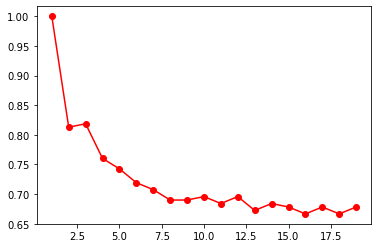

In [15]:
plt.plot(np.arange(1,20,1),[i[0] for i in acc],"ro-")

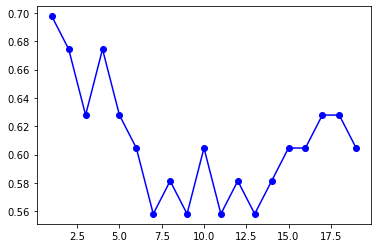

In [16]:
plt.plot(np.arange(1,20,1),[i[1] for i in acc],"bo-")

### 2.	A National Zoopark in India is dealing with the problem of segregation of the animals based on the different attributes they have. Build a KNN model to automatically classify the animals. Explain any inferences you draw in the documentation.

In [20]:
zoo = pd.read_csv(r"C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\KNN\Zoo.csv")

In [21]:

# Normalization function 
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)


zoo=zoo.iloc[:,1:]
# Normalized data frame (considering the numerical part of data)
zoo_n = norm_func(zoo.iloc[:, 1:16])
zoo_n.describe()

,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,0.355198,0.742574,0.128713,0.435644
std,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,0.254173,0.439397,0.336552,0.498314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
X = np.array(zoo_n.iloc[:,:]) # Predictors 
Y = np.array(zoo['type']) # Target 

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

In [27]:

pred = knn.predict(X_test)
pred

array([1, 6, 1, 7, 1, 7, 5, 6, 3, 6, 6, 2, 4, 4, 1, 6, 4, 1, 2, 1, 4],
      dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, pred))
pd.crosstab(Y_test, pred, rownames = ['Actual'], colnames= ['Predictions']) 

0.9047619047619048


Predictions,1,2,3,4,5,6,7
Actual,,,,,,,
1,6,0,0,0,0,0,0
2,0,2,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,4,0,0,0
5,0,0,0,0,1,0,0
6,0,0,0,0,0,3,0
7,0,0,0,0,0,2,2


In [29]:
pred_train = knn.predict(X_train)
print(accuracy_score(Y_train, pred_train))
pd.crosstab(Y_train, pred_train, rownames=['Actual'], colnames = ['Predictions']) 

0.975


Predictions,1,2,3,4,5,6,7
Actual,,,,,,,
1,35,0,0,0,0,0,0
2,0,18,0,0,0,0,0
3,0,1,3,0,0,0,0
4,0,0,0,9,0,0,0
5,0,0,0,0,3,0,0
6,0,0,0,0,0,5,0
7,1,0,0,0,0,0,5


In [30]:
acc = []

In [31]:
for i in range(1,20,1):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    acc.append([train_acc, test_acc])

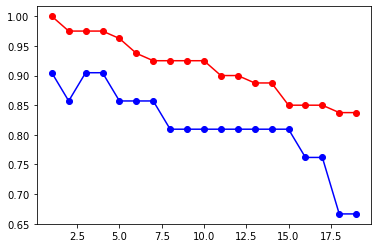

In [32]:
import matplotlib.pyplot as plt # library to do visualizations 

# train accuracy plot 
plt.plot(np.arange(1,20,1),[i[0] for i in acc],"ro-")

# test accuracy plot
plt.plot(np.arange(1,20,1),[i[1] for i in acc],"bo-")